In [19]:
# import Librerie
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# ESERCIZIO 1
Calcolare la regione di Assoluta Stabilità per il metodo di Heun di cui ricordiamo lo schema:

$$ u_{n+1} = u_n + \frac{h}{2} \left[ f(t_n,u_n) + f(t_{n+1}, u_n + h f(t_n,u_n)) \right]$$

La funzione $R$ di assoluta stabilità di questo metodo è

$$R(z) = 1 + z + \frac{z^2}{2}$$

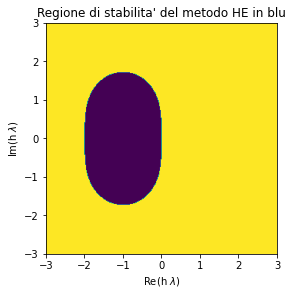

In [20]:
def calcola_Rabs(z, metodo):
    if metodo=='EE':
        Rabs = abs(1+z) #EE 
    elif metodo=='EI':
        Rabs = abs(1./(1.-z));  #EI
    elif metodo=='TR':
        Rabs = abs((2+z)/(2-z)) #TR
    elif metodo=='HE':
        Rabs = abs(1 + z + z**2/2)
    else:
        print('errore nella scelta del metodo')

    if Rabs >1:
        return 1
    else:   # regione di stabilita'
        return -1


def regione_stabilita(xmin,xmax,ymin,ymax,img_width,img_height, metodo):
    # funzione che ha come output l'array 2-dimensionale contenente i valori di 
    # R(z) sui nodi della griglia con estremi  xmin,xmax,ymin,ymax  
    # e con "img_width punti" lungo il primo asse, "img_height" lungo il secondo
    x = np.linspace(xmin, xmax, img_width)
    y = np.linspace(ymin, ymax, img_height)
    img = np.empty((img_width,img_height))
    
    for pos_x in range(img_width) :
        for pos_y in range(img_height) :
            z = x[pos_x] + 1j*y[pos_y]
            img[pos_x,pos_y] = calcola_Rabs(z, metodo);
        #endfor
    #endfor
    return img


def R_image(img, xmin, xmax, ymin, ymax,metodo):
    # funzione che fa il grafico della regione di stabilita' per il metodo scelto
    dpi = 72
    width  = img.shape[0] / dpi 
    height = img.shape[1] / dpi
    
    fig, ax = plt.subplots(figsize=(width, height), dpi = 72)
    ax.imshow(img.T, extent=[xmin, xmax, ymin, ymax])
    plt.xlabel("Re(h $\lambda$)")
    plt.ylabel("Im(h $\lambda$)")
    plt.title("Regione di stabilita' del metodo %s in blu" %metodo)
    return


maxval = 3.
xmin = -maxval
xmax = maxval
ymin = -maxval
ymax = maxval
img_width = 300
img_height = 300

for metodo in ['HE']:  # in ['EE','EI','TR']:
    img_stab = regione_stabilita(xmin,xmax,ymin,ymax,img_width,img_height, metodo);
    R_image(img_stab, xmin, xmax, ymin, ymax, metodo)
#end

# Esercizio 2
### Vediamo un altro approccio fare il grafico della Regione di Stabilità del metodo di Eulero Esplicito:


Nel caso di Eulero Esplicito abbiamo visto che 
$$ R(z) = (1+z)$$ 

Per fare il grafico della regione  
$$|R(z)|<1$$
risolviamo l'equazione associata 
$$|R(z)|=1$$
in modo da disegnare il bordo che separa le due regioni.
<br>

Per fare questo dividiamo il cerchio unitario in $N$ punti e risolviamo le corrispondenti $N$ equazioni non lineari (utilizzando ad esempio `scipy.optimize.newton`):
<br>

$$R(z_k)= e^{i\, \theta_k} \quad \text{ per } \, k=1,\dots, N$$
dove $\theta_k = 2 \pi  \frac{k}{N} $.

I punti $z_k$ per $ k=1,\dots, N$ descriveranno il bordo della regione di assoluta stabilità.

<br>

Completare il codice sottostante.

In [21]:
# import Librerie
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [22]:
# Regione di stabilità per Eulero Esplicito
R=lambda z: (1.+z)
dR=lambda z: 1.


# Scegliere il numero N di angoli da considerare
N = 150

z = np.zeros((N), dtype=np.complex)   # nota: è importante definire il tipo di z come complesso
z[0]=0.
theta=np.arange(0,2*np.pi,2*np.pi/N)

for k in range(1,N):
    '''
    Risolvere l'equazione per ogni valore dell'angolo theta e salvarla nell'indice corrente dell'array complesso z.
    Come punto iniziale per il metodo di newton considerare ad esempio il punto z_{k-1} precedente
    '''
    z[k] = optimize.newton( lambda zeta : 1 + zeta - np.e**(1j*theta[k]), theta[k] )
#end for


C:\Users\Andrea\AppData\Local\Temp\ipykernel_25860\2293872753.py:9: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros((N), dtype=np.complex)   # nota: è importante definire il tipo di z come complesso


Text(0.5, 1.0, "Regione di stabilita' in blu")

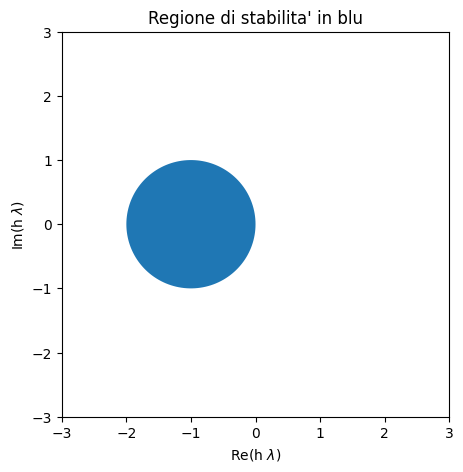

In [23]:
# GRAFICO: fare il grafico con parte reale di z_EE (np.real(z_EE)) e parte immaginaria di z_EE (np.imag(z_EE)) sugli assi x e y rispettivamente
plt.figure(figsize=(5, 5))
plt.xlim(-3, 3);
plt.ylim(-3,3);
plt.fill(np.real(z), np.imag(z))
plt.xlabel("Re(h $\lambda$)")
plt.ylabel("Im(h $\lambda$)")
plt.title("Regione di stabilita' in blu")

# Esercizio 3
Nella terza settimana del corso vederete come scrivere codice in parallelo utilizzando `numba` in modo da velocizzare le performance.

Dopo aver visto tale parte potrete quindi riscrivere in parallelo il codice per il calcolo della regione di stabilità, visto nel notebook precedente (non quello dell'esercizio soprastante).
